# Import necessary module

In [481]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# Reading the file

In [482]:
infile=r"train.csv"
df=pd.read_csv(infile)

In [483]:
df.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

In [484]:
x_vals=df.copy()

x_vals.drop('critical_temp',1,inplace=True)

y_vals=df['critical_temp']

# Density plot for TC

(-8.910613218333335, 193.91082321833335, 0.0, 0.0521189536761906)

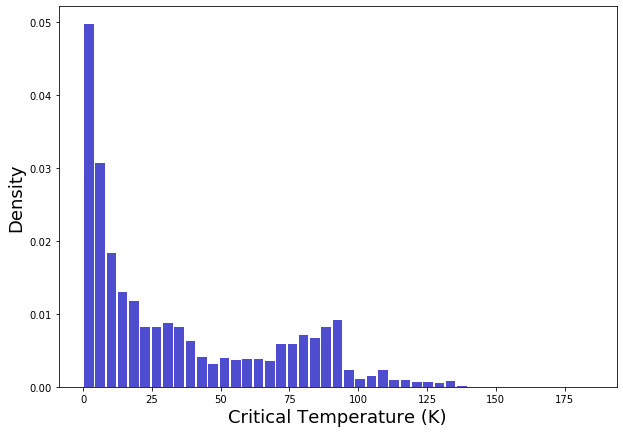

In [486]:
fig, ax = plt.subplots(figsize=(10, 7))
n, bins, patches = plt.hist(x=y_vals, density=True, bins='auto', color='#0300bb',
                            alpha=0.7, rwidth=0.85)
#plt.grid(axis='Density', alpha=0.75)
plt.xlabel('Critical Temperature (K)',size=18)
plt.ylabel('Density',size=18)
plt.axis("tight")


# Descriptive statistics for all the features

In [487]:
df.describe()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        21263.000000      21263.000000          21263.000000   
mean             4.115224         87.557631             72.988310   
std              1.439295         29.676497             33.490406   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.458076             52.143839   
50%              4.000000         84.922750             60.696571   
75%              5.000000        100.404410             86.103540   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       21263.000000           21263.000000         21263.000000   
mean           71.290627              58.539916             1.165608   
std            31.030272              36.651067             0.364930   
min             5.320573               1.960849             0.000000   
25%            58.041225              35.248990             0.966676   
50%            66.361592              39.918385             1.199541   
75%            78.116681              73.113234             1.444537   
max           208.980400             208.980400             1.983797   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
count             21263.000000       21263.000000           21263.000000   
mean                  1.063884         115.601251              33.225218   
std                   0.401423          54.626887              26.967752   
min                   0.000000           0.000000               0.000000   
25%                   0.775363          78.512902              16.824174   
50%                   1.146783         122.906070              26.636008   
75%                   1.359418         154.119320              38.356908   
max                   1.958203         207.972460             205.589910   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  \
count     21263.000000  ...      21263.000000   21263.000000   
mean         44.391893  ...          3.153127       3.056536   
std          20.035430  ...          1.191249       1.046257   
min           0.000000  ...          1.000000       1.000000   
25%          32.890369  ...          2.116732       2.279705   
50%          45.123500  ...          2.618182       2.615321   
75%          59.322812  ...          4.026201       3.727919   
max         101.019700  ...          7.000000       7.000000   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
count       21263.000000     21263.000000         21263.000000   21263.000000   
mean            3.055885         1.295682             1.052841       2.041010   
std             1.174815         0.393155             0.380291       1.242345   
min             1.000000         0.000000             0.000000       0.000000   
25%             2.091251         1.060857             0.775678       1.000000   
50%             2.434057         1.368922             1.166532       2.000000   
75%             3.914868         1.589027             1.330801       3.000000   
max             7.000000         2.141963             1.949739       6.000000   

       wtd_range_Valence   std_Valence  wtd_std_Valence  critical_temp  
count       21263.000000  21263.000000     21263.000000   21263.000000  
mean            1.483007      0.839342         0.673987      34.421219  
std             0.978176      0.484676         0.455580      34.254362  
min             0.000000      0.000000         0.000000       0.000210  
25%             0.921454      0.451754         0.306892       5.365000  
50%             1.063077      0.800000         0.500000      20.000000  
75%             1.918400      1.200000         1.020436      63.000000  
max             6.992200      3.000000         3.000000     185.000000  

[8 rows x 82 columns]

# Feature Selection

In [488]:
#sns.pairplot(df.loc[:,df.dtypes == 'float64'])

### Corelation Between different pair of variables

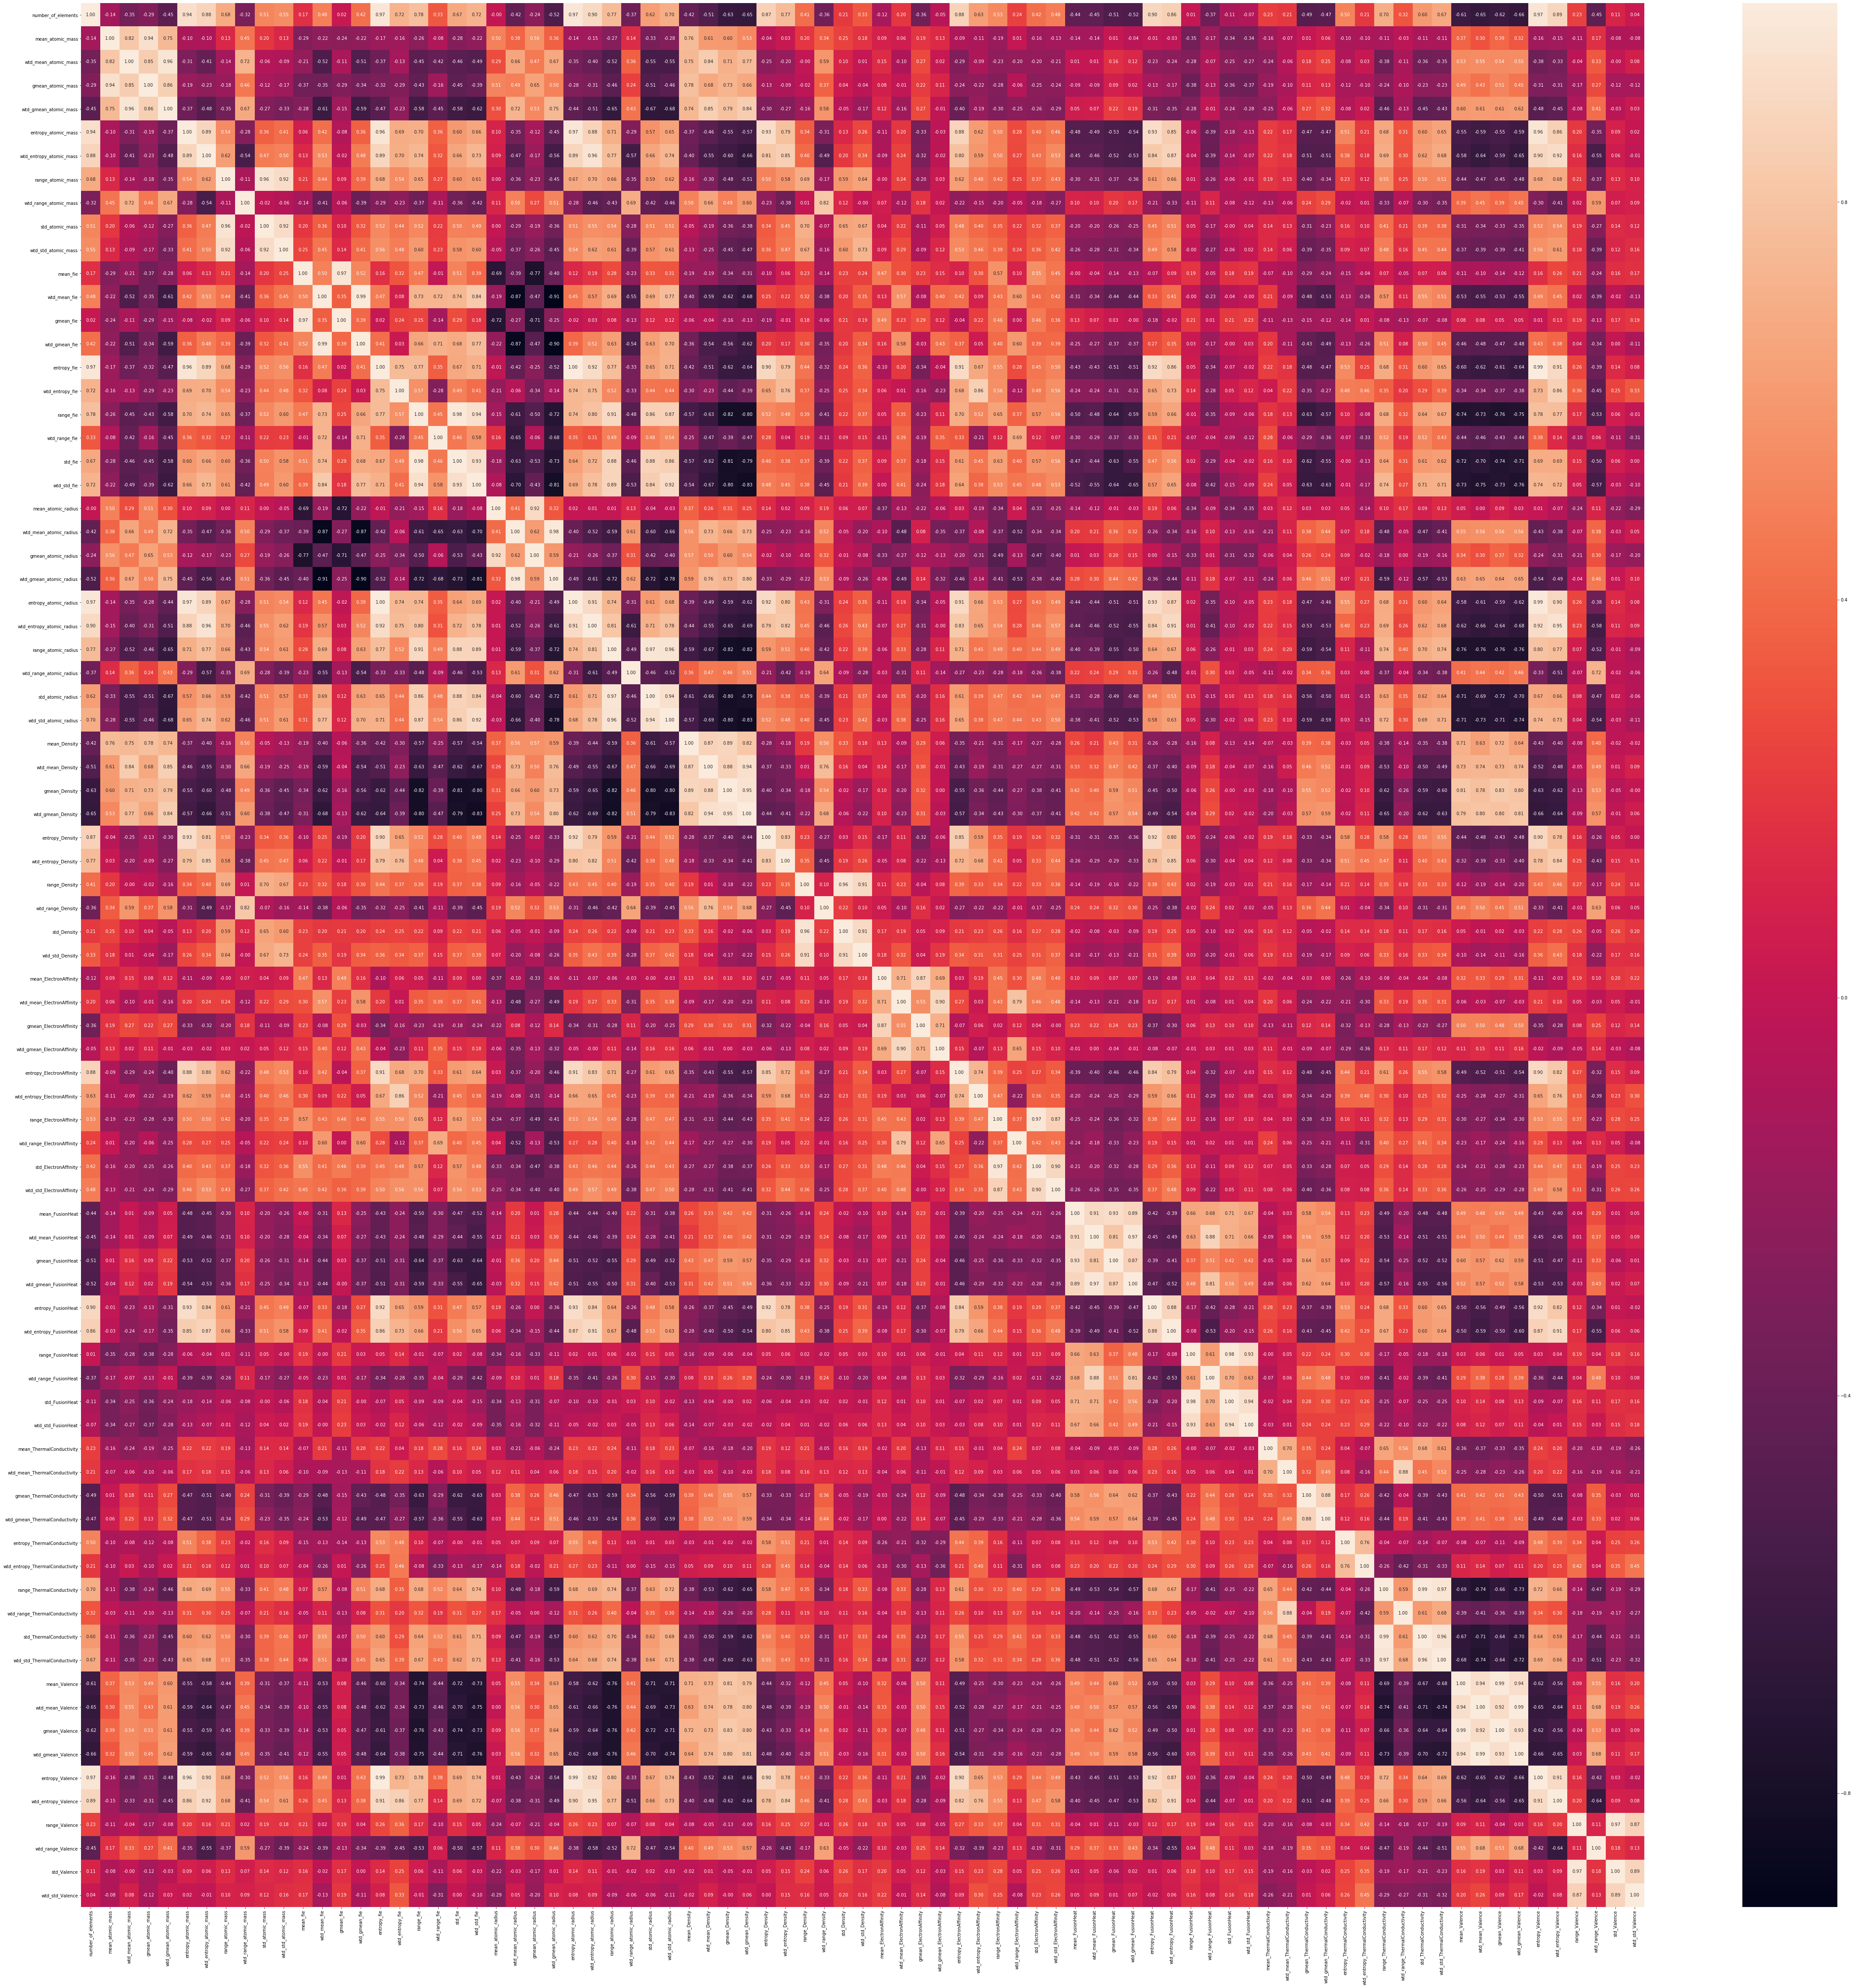

In [106]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(80, 80))
sb.heatmap(x_vals.corr(),annot=True, fmt=".2f")
plt.axis('tight')
plt.savefig('corelation_com_data4_1.png')

plt.show()

### Decision Tree based models

In [489]:
#spliting data_set into test and train set and fit into Gradient Boosted Approaches
X_train, X_test, Y_train, Y_test = train_test_split(x_vals, y_vals, random_state=0)
gbr = GradientBoostingRegressor(random_state=0)
gbr=gbr.fit(X_train, Y_train)
gbr_train=gbr.score(X_train, Y_train)
gbr_test=gbr.score(X_test, Y_test)
print("Accuracy on training set: {:.3f}".format(gbr.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(gbr.score(X_test, Y_test)))
Y_pred=gbr.predict(X_test)
RMSE_gbr= sqrt(mean_squared_error(Y_test, Y_pred))
print("r2=", r2_score(Y_test, Y_pred))
print("RMSE=",RMSE_gbr)

Accuracy on training set: 0.877
Accuracy on test set: 0.862
r2= 0.8616864170543358
RMSE= 12.713369707977842


In [491]:
data_features_name=list(x_vals.columns)

In [492]:
# define function to estimate feture importance and ploting
def plot_feature_importances_demand(model):
    n_features = int(x_vals.shape[1])
    fig, ax = plt.subplots(figsize=(15, 30))
    plt.barh(range(n_features), model.feature_importances_, align='center',color='c')
    plt.yticks(np.arange(n_features),data_features_name,size=12 )
    plt.xlabel("Feature importance",size=12)
    plt.ylabel("Feature",size=12)
    plt.ylim(-1, n_features)

In [493]:
#feature importance for gradient boosted regression
plot_feature_importances_demand(gbr)

### plotting most important features

(0.0, 0.4883919155999095, -1.3900000000000001, 20.39)

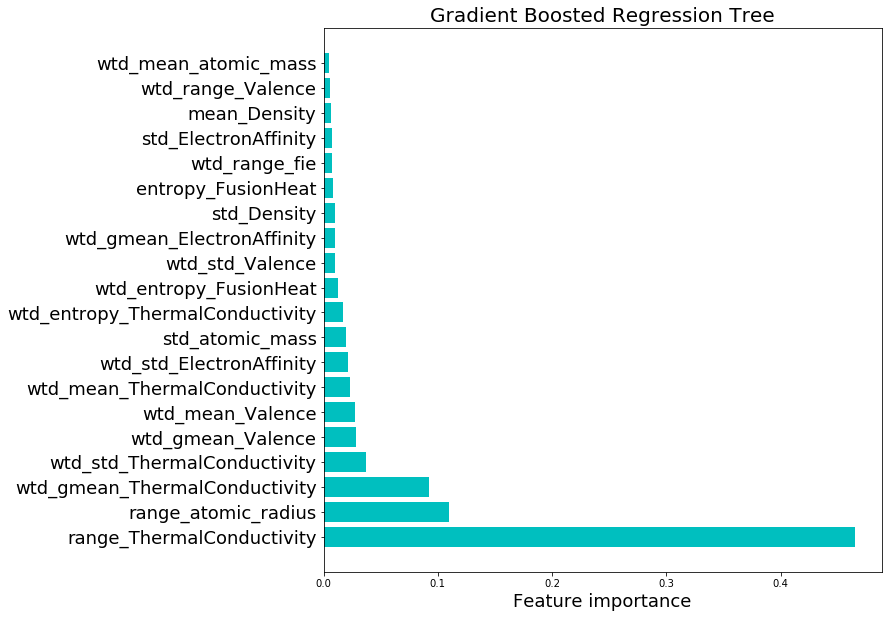

In [494]:
gbr_imp=gbr.feature_importances_
df_gbrimp=pd.DataFrame(gbr_imp,columns=['importance'])
df_gbrimp['features']=data_features_name
df_gbrimp=df_gbrimp.sort_values('importance',ascending=False)
df_gbr_20=df_gbrimp.head(20)
fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(range(20), df_gbr_20['importance'], align='center',color='c')
plt.yticks(np.arange(20),list(df_gbr_20['features']),size=18 )
plt.xlabel("Feature importance",size=18)
#plt.ylabel("Feature",size=12)
plt.ylim(-1, 20)
plt.title("Gradient Boosted Regression Tree",size=20)
plt.axis('tight')

### Pair plot for the most important features

In [497]:
pair_plot=df_gbrimp.head(10)
pair_list=list(pair_plot['features'])
df_pplot=df.filter(pair_list)

In [498]:
pair_list

['range_ThermalConductivity',
 'range_atomic_radius',
 'wtd_gmean_ThermalConductivity',
 'wtd_std_ThermalConductivity',
 'wtd_gmean_Valence',
 'wtd_mean_Valence',
 'wtd_mean_ThermalConductivity',
 'wtd_std_ElectronAffinity',
 'std_atomic_mass',
 'wtd_entropy_ThermalConductivity']

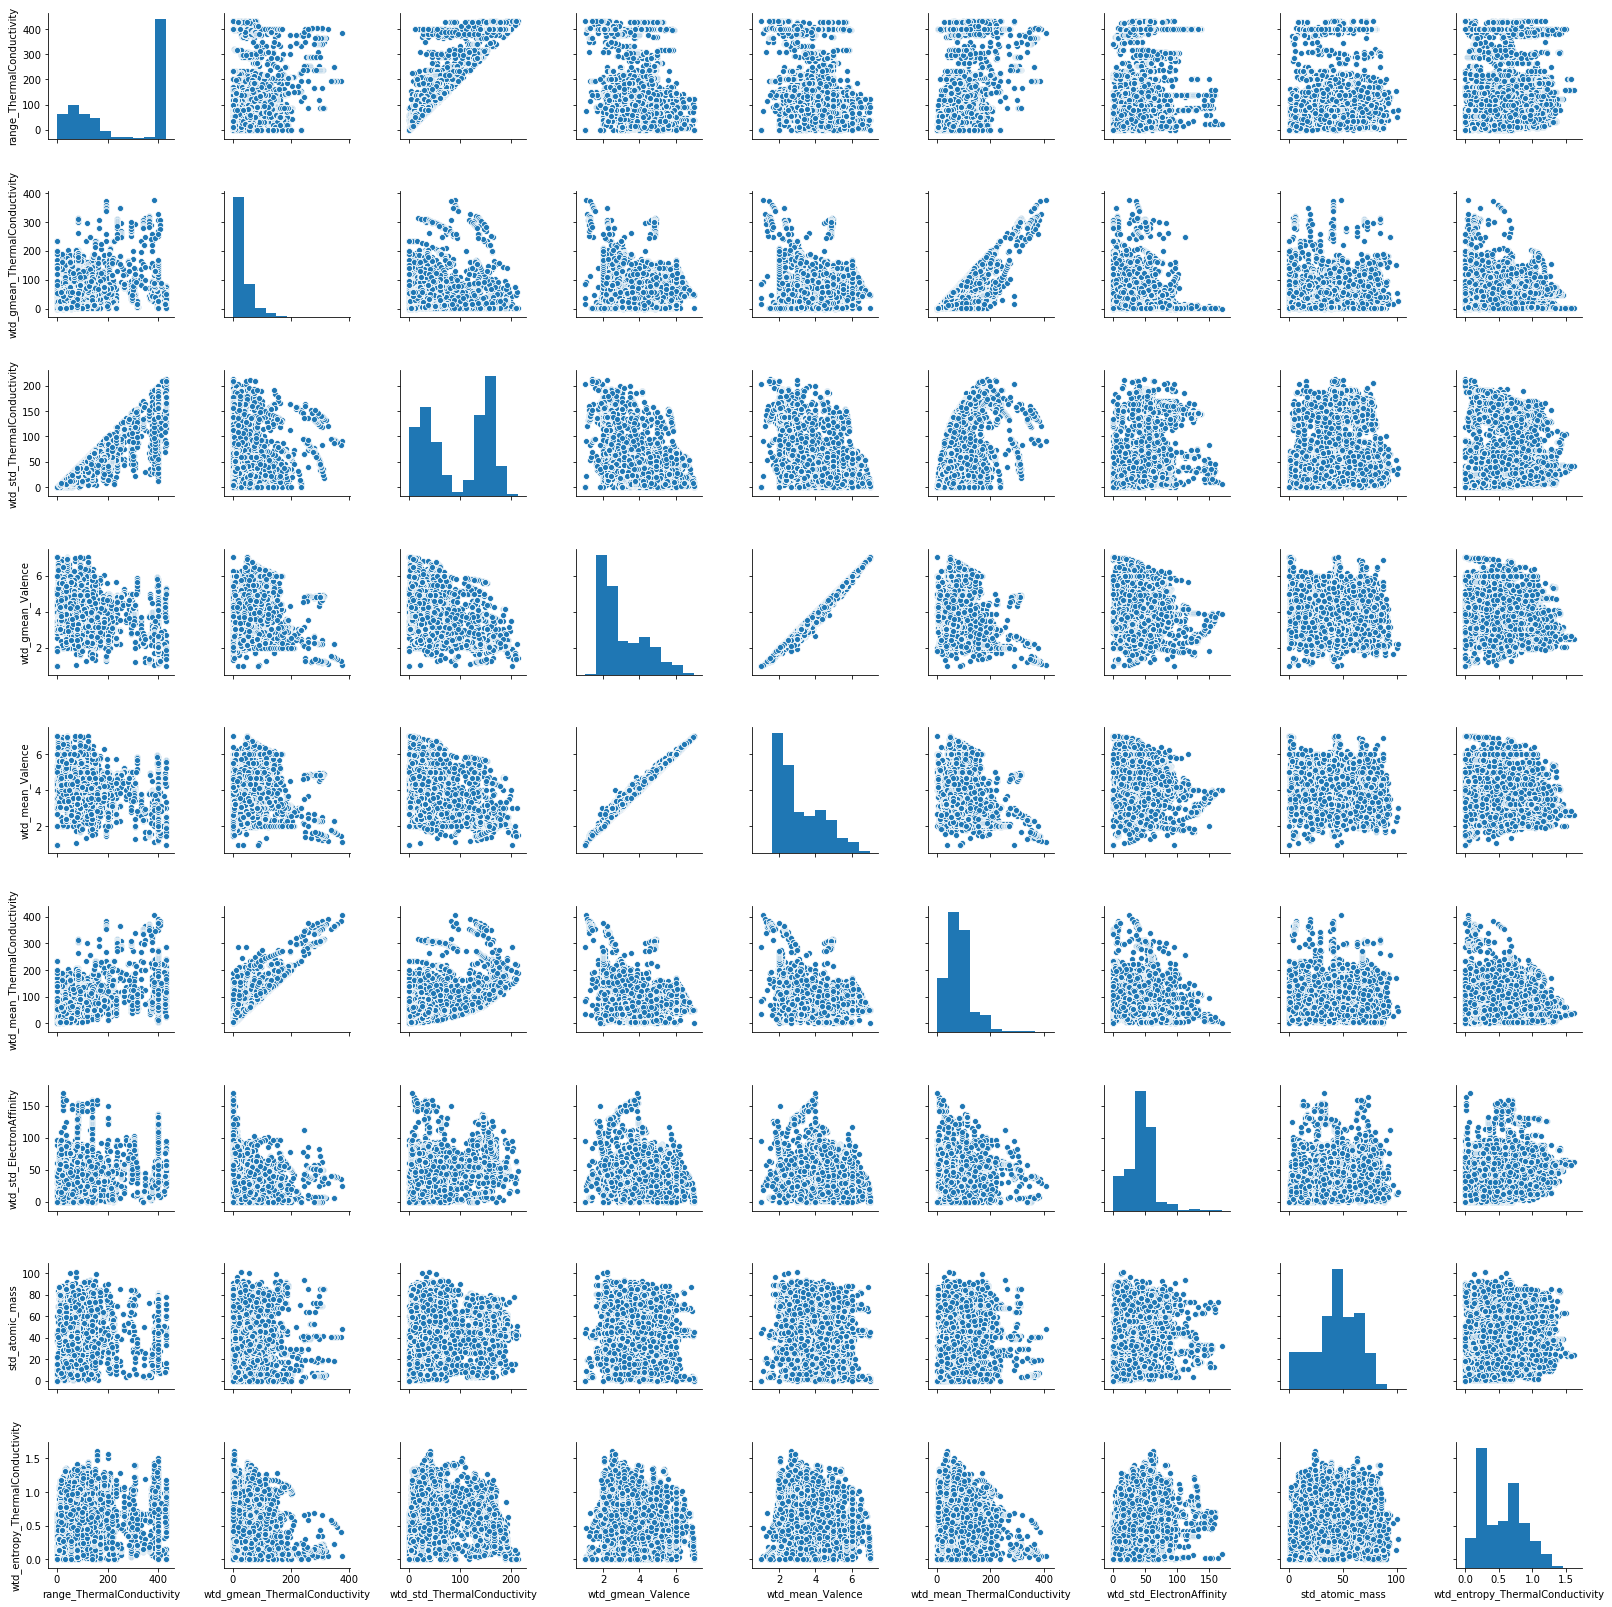

In [499]:
sns.pairplot(df_pplot.loc[:,df_pplot.dtypes == 'float64'])
plt.show()

### Pearson Corelation value for the first 10 most important features

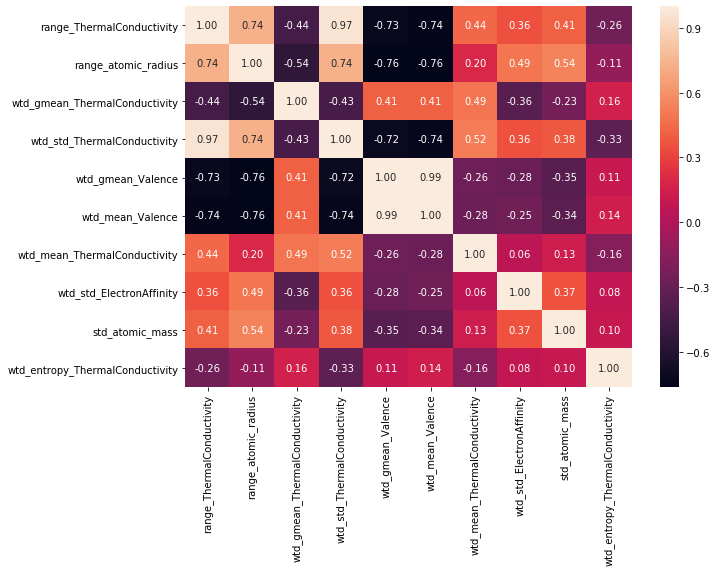

In [500]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 7))
sb.heatmap(df_pplot.corr(),annot=True, fmt=".2f")
plt.axis('tight')
plt.savefig('corelation_10.png')

plt.show()

### Box plot for the most important features

No handles with labels found to put in legend.


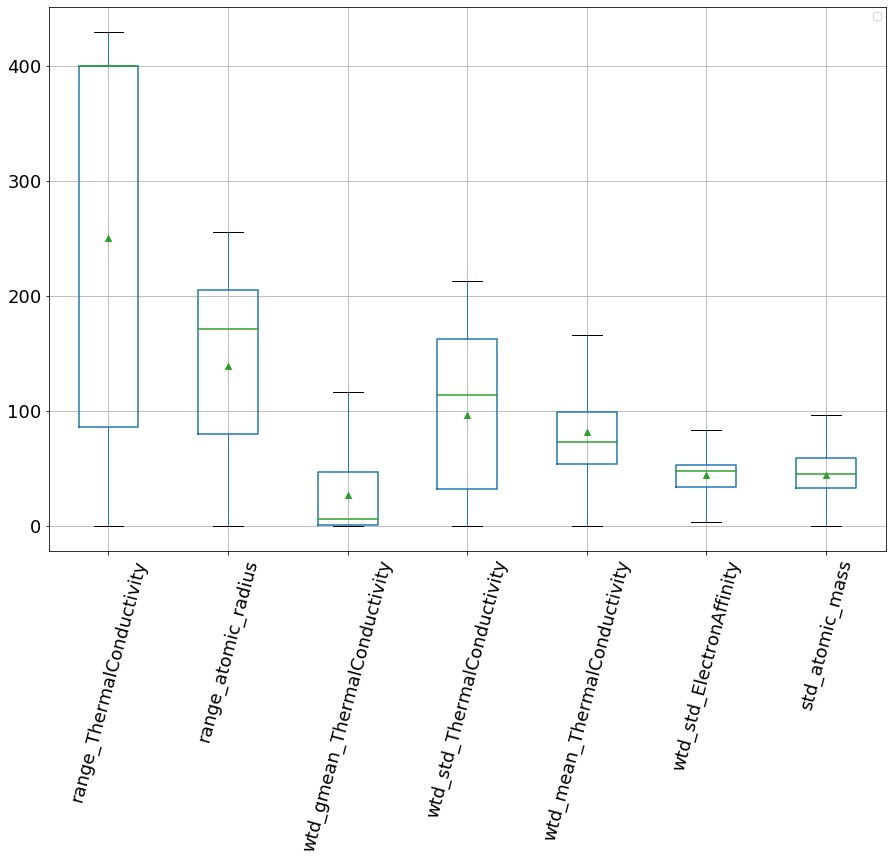

In [508]:
plist=['range_ThermalConductivity',
 'range_atomic_radius',
 'wtd_gmean_ThermalConductivity',
 'wtd_std_ThermalConductivity',
 'wtd_mean_ThermalConductivity',
 'wtd_std_ElectronAffinity',
 'std_atomic_mass']

boxprops = dict(linestyle='-', linewidth=1.5, color='k')
medianprops = dict(linestyle='-', linewidth=1.5, color='b')
fig, ax = plt.subplots(figsize=(15, 10))
bp = df.boxplot(column=plist,rot=75,
                showfliers=False, showmeans=True,
                boxprops=boxprops, medianprops=medianprops,
                return_type='dict',fontsize=18)
plt.legend()

### Filtering only the important features: threshold 0.001

In [626]:
df_gbrimpnew=df_gbrimp[df_gbrimp['importance']>0.001]
len(df_gbrimpnew)
to_filter=list(df_gbrimpnew['features'])
x_vals_new=x_vals.filter(to_filter)

In [512]:
x_vals_new

range_ThermalConductivity  range_atomic_radius  \
0                      399.97342                  205   
1                      429.97342                  205   
2                      399.97342                  205   
3                      399.97342                  205   
4                      399.97342                  205   
...                          ...                  ...   
21258                  134.00000                  111   
21259                  399.97342                  205   
21260                   17.00000                   29   
21261                   17.00000                   29   
21262                   78.48000                   53   

       wtd_gmean_ThermalConductivity  wtd_std_ThermalConductivity  \
0                           0.621979                   138.517163   
1                           0.619735                   139.630922   
2                           0.619095                   138.540613   
3                           0.620535                   138.528893   
4                           0.624878                   138.493671   
...                              ...                          ...   
21258                      95.001493                    46.595943   
21259                       1.577047                   156.558695   
21260                      57.038314                     6.800000   
21261                      58.781651                     7.862385   
21262                      12.919996                    38.254432   

       wtd_gmean_Valence  wtd_mean_Valence  wtd_mean_ThermalConductivity  \
0               2.219783          2.257143                     61.015189   
1               2.210679          2.257143                     61.372331   
2               2.232679          2.271429                     60.943760   
3               2.226222          2.264286                     60.979474   
4               2.206963          2.242857                     61.086617   
...                  ...               ...                           ...   
21258           3.519911          3.555556                    111.537778   
21259           2.038991          2.047619                    108.680590   
21260           4.781762          4.800000                     57.400000   
21261           4.665819          4.690000                     59.270000   
21262           4.242641          4.500000                     40.752000   

       wtd_std_ElectronAffinity  std_atomic_mass  \
0                     42.558396        51.968828   
1                     41.667621        47.094633   
2                     41.639878        51.968828   
3                     42.102344        51.968828   
4                     43.452059        51.968828   
...                         ...              ...   
21258                 55.219027        65.764081   
21259                 57.634544        69.232655   
21260                 12.960000         6.756810   
21261                 14.984781         6.756810   
21262                 87.740504        29.905282   

       wtd_entropy_ThermalConductivity  ...  wtd_std_Density  \
0                             0.262848  ...      3572.596624   
1                             0.567706  ...      3632.649185   
2                             0.250477  ...      3592.019281   
3                             0.257045  ...      3582.370597   
4                             0.272820  ...      3552.668664   
...                                ...  ...              ...   
21258                         0.634332  ...      2978.412680   
21259                         0.745515  ...      3937.105612   
21260                         0.559446  ...      1381.200000   
21261                         0.659671  ...      1596.989169   
21262                         0.142553  ...      1039.909655   

       wtd_range_ThermalConductivity  wtd_gmean_FusionHeat  \
0                          57.127669              1.040986   
1                          51.413383              1.035251   


### filtering all Highly correlated variables

In [627]:
# Create correlation matrix
corr_matrix_new = x_vals_new.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix_new.where(np.triu(np.ones(corr_matrix_new.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.95)]

# Multiple Linear Regression Model

In [523]:
x_vals_new['Intercept']=1

In [524]:
# dropping unnecessary varables

x_vals_new1=x_vals_new.drop(['wtd_entropy_Valence','entropy_Density','mean_fie','wtd_mean_atomic_mass','entropy_ThermalConductivity','wtd_range_fie','gmean_Valence','std_atomic_mass'], axis=1)

## Model fitting

In [525]:
model=sm.OLS(y_vals,x_vals_new1)

res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          critical_temp   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1364.
Date:                Thu, 03 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:21:33   Log-Likelihood:                -92167.
No. Observations:               21263   AIC:                         1.844e+05
Df Residuals:                   21224   BIC:                         1.847e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
range_Ther

In [526]:
#Save the results

def myprint(s):
    with open('C:\Graduate Courses\Fall 2019\STA 5731\Assignment_1\modelsummary38.txt','w+') as f:
        print(s, file=f)

myprint(res.summary())

## Again Check on collinearity 

In [527]:
# Create correlation matrix
corr_matrix_new = x_vals_new1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix_new.where(np.triu(np.ones(corr_matrix_new.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.95)]

## Run the Model Again after removing few more variables

In [530]:
x_vals_new2=x_vals_new1.drop(to_drop,axis=1)
x_vals_new2=x_vals_new1.drop(['std_Density','mean_Density','wtd_entropy_Density','wtd_gmean_FusionHeat'],axis=1)

In [532]:
model=sm.OLS(y_vals,x_vals_new2)

res = model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          critical_temp   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     1520.
Date:                Thu, 03 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:22:30   Log-Likelihood:                -92190.
No. Observations:               21263   AIC:                         1.845e+05
Df Residuals:                   21228   BIC:                         1.847e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
range_Ther

In [533]:
def myprint(s):
    with open('C:\Graduate Courses\Fall 2019\STA 5731\Assignment_1\modelsummary34.txt','w+') as f:
        print(s, file=f)

myprint(res.summary())

## Prediction with the model

(-9.2497795, 194.2499895, -46.44201870955047, 196.02104850997577)

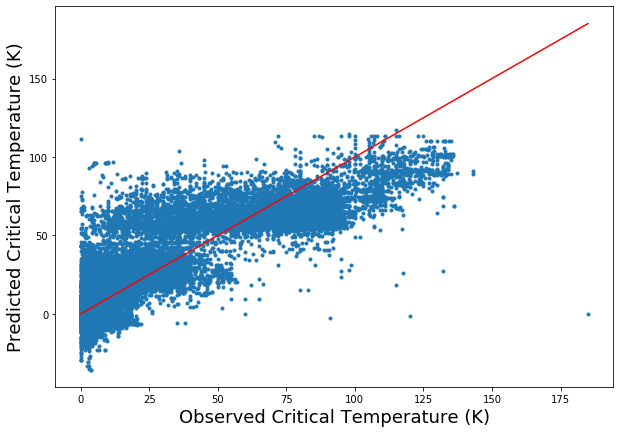

In [534]:
Y=res.predict(x_vals_new2)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(y_vals,Y,'.')
ax.plot(np.unique(y_vals), np.poly1d(np.polyfit(Y, y_vals, 1))(np.unique(y_vals)),
         color='red')
plt.xlabel("Observed Critical Temperature (K)",size=18)
plt.ylabel("Predicted Critical Temperature (K)",size=18)
#plt.ylim(-1, 20)
#plt.title("Random Forest Regression",size=20)
plt.axis('tight')



In [535]:
RMSE= sqrt(mean_squared_error(y_vals, Y))
RMSE

18.48149318549132

In [536]:
print("r2=", r2_score(y_vals, Y))

r2= 0.7088862217008045


## Final Model Table

In [420]:
f = open("C:\Graduate Courses\Fall 2019\STA 5731\Assignment_1\Final_model.txt", "r")
line = f.readline()
Ev=[]
coeff=[]
std_er=[]
t_stat=[]
p_val=[]

while len(line):
    l = line.split("\t")
    try:
        for i in l:
            w=i.split()
            #print(w)
            Ev.append(w[0])
            coeff.append(w[1])
            std_er.append(w[2])
            t_stat.append(w[3])
            p_val.append(w[4])
    except:
        pass
            
    line = f.readline()
f.close()


['range_ThermalConductivity', '-0.0853', '0.011', '-7.788', '0.000', '-0.107', '-0.064;']
['range_atomic_radius', '0.0783', '0.011', '7.332', '0.000', '0.057', '0.099;']
['wtd_gmean_ThermalConductivity', '-0.4459', '0.016', '-28.106', '0.000', '-0.477', '-0.415;']
['wtd_std_ThermalConductivity', '0.0525', '0.018', '2.943', '0.003', '0.018', '0.088;']
['wtd_gmean_Valence', '-12.2954', '3.021', '-4.070', '0.000', '-18.217', '-6.374;']
['wtd_mean_Valence', '11.2363', '3.139', '3.579', '0.000', '5.083', '17.390;']
['wtd_mean_ThermalConductivity', '0.5081', '0.020', '25.924', '0.000', '0.470', '0.547;']
['wtd_std_ElectronAffinity', '-0.6234', '0.027', '-23.081', '0.000', '-0.676', '-0.570;']
['wtd_entropy_ThermalConductivity', '7.8779', '1.048', '7.516', '0.000', '5.823', '9.932;']
['wtd_entropy_FusionHeat', '23.5639', '1.281', '18.391', '0.000', '21.052', '26.075;']
['wtd_std_Valence', '-13.8100', '0.825', '-16.735', '0.000', '-15.427', '-12.192;']
['wtd_gmean_ElectronAffinity', '-0.5437',

In [425]:
Result=pd.DataFrame(Ev,columns=['Explanatory Variables'])
Result['Coefficient']=coeff
Result['Std. Error']=std_er
Result['t-statistic']=t_stat
Result['p-value']=p_val

In [479]:
Result.to_csv("result.csv")

## Out of sample testing

### Multiple Linear regression

In [537]:
x_vals_new2

range_ThermalConductivity  range_atomic_radius  \
0                      399.97342                  205   
1                      429.97342                  205   
2                      399.97342                  205   
3                      399.97342                  205   
4                      399.97342                  205   
...                          ...                  ...   
21258                  134.00000                  111   
21259                  399.97342                  205   
21260                   17.00000                   29   
21261                   17.00000                   29   
21262                   78.48000                   53   

       wtd_gmean_ThermalConductivity  wtd_std_ThermalConductivity  \
0                           0.621979                   138.517163   
1                           0.619735                   139.630922   
2                           0.619095                   138.540613   
3                           0.620535                   138.528893   
4                           0.624878                   138.493671   
...                              ...                          ...   
21258                      95.001493                    46.595943   
21259                       1.577047                   156.558695   
21260                      57.038314                     6.800000   
21261                      58.781651                     7.862385   
21262                      12.919996                    38.254432   

       wtd_gmean_Valence  wtd_mean_Valence  wtd_mean_ThermalConductivity  \
0               2.219783          2.257143                     61.015189   
1               2.210679          2.257143                     61.372331   
2               2.232679          2.271429                     60.943760   
3               2.226222          2.264286                     60.979474   
4               2.206963          2.242857                     61.086617   
...                  ...               ...                           ...   
21258           3.519911          3.555556                    111.537778   
21259           2.038991          2.047619                    108.680590   
21260           4.781762          4.800000                     57.400000   
21261           4.665819          4.690000                     59.270000   
21262           4.242641          4.500000                     40.752000   

       wtd_std_ElectronAffinity  wtd_entropy_ThermalConductivity  \
0                     42.558396                         0.262848   
1                     41.667621                         0.567706   
2                     41.639878                         0.250477   
3                     42.102344                         0.257045   
4                     43.452059                         0.272820   
...                         ...                              ...   
21258                 55.219027                         0.634332   
21259                 57.634544                         0.745515   
21260                 12.960000                         0.559446   
21261                 14.984781                         0.659671   
21262                 87.740504                         0.142553   

       wtd_entropy_FusionHeat  ...  std_ThermalConductivity  \
0                    0.994998  ...               168.854244   
1                    1.073094  ...               198.554600   
2                    0.927479  ...               168.854244   
3                    0.964031  ...               168.854244   
4                    1.044970  ...               168.854244   
...                       ...  ...                      ...   
21258                0.631341  ...                55.056789   
21259                1.203223  ...               151.164639   
21260                0.395385  ...                 8.500000   
21261                0.525289  ...                 8.500000   
21262                0.826780  ...                36.425359   

      

#### 75% and 25% spliting and random sampling 
#### Training the model over training set and testing over testing data set

In [567]:
X_train, X_test, Y_train, Y_test = train_test_split(x_vals_new2, y_vals, random_state=0)

In [593]:
model=sm.OLS(Y_train,X_train)
res = model.fit()
#print(res.summary())
Y_pred=res.predict(X_test)
RMSE_lgr= sqrt(mean_squared_error(Y_test, Y_pred))
print(RMSE_lgr)
r2 = r2_score(Y_test, Y_pred)
print("r2=", r2_score(Y_test, Y_pred))

18.548765219917673
r2= 0.7055758113694482


(-44.27449582983439, 144.5844998014207, -6.799349000000001, 142.799969)

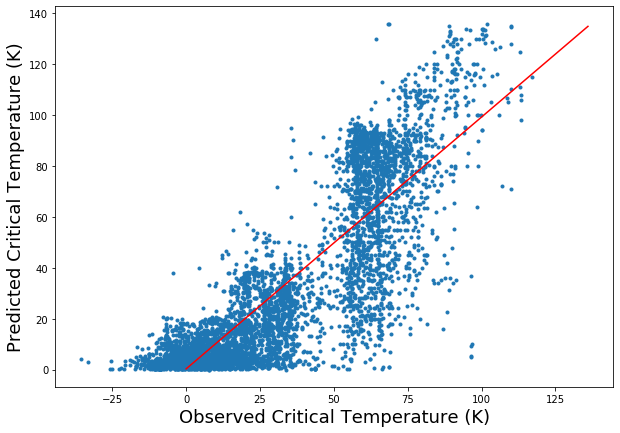

In [540]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(Y_pred,Y_test,'.')
ax.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_pred, Y_test, 1))(np.unique(Y_test)),color='red')
plt.xlabel("Observed Critical Temperature (K)",size=18)
plt.ylabel("Predicted Critical Temperature (K)",size=18)
#plt.ylim(-1, 20)
#plt.title("Random Forest Regression",size=20)
plt.axis('tight')

### Random Forest

In [622]:
X_train, X_test, Y_train, Y_test = train_test_split(x_vals_new2, y_vals, random_state=0)
rnf = RandomForestRegressor(random_state=0)
rnf.fit(X_train, Y_train)
rnf_train=rnf.score(X_train, Y_train)
rnf_test=rnf.score(X_test, Y_test)
print("Accuracy on training set: {:.3f}".format(rnf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rnf.score(X_test, Y_test)))
Y_pred=rnf.predict(X_test)
RMSE_rnf= sqrt(mean_squared_error(Y_test, Y_pred))
print("r2=", r2_score(Y_test, Y_pred))

print("RMSE=",RMSE_rnf)

C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy on training set: 0.974
Accuracy on test set: 0.909
r2= 0.908730207772574
RMSE= 10.327418863803013


### Gradient Boosted Regression Tree

In [595]:
#spliting data_set into test and train set and fit into Gradient Boosted Approaches
X_train, X_test, Y_train, Y_test = train_test_split(x_vals_new2, y_vals, random_state=0)
gbr = GradientBoostingRegressor(random_state=0)
gbr=gbr.fit(X_train, Y_train)
gbr_train=gbr.score(X_train, Y_train)
gbr_test=gbr.score(X_test, Y_test)
print("Accuracy on training set: {:.3f}".format(gbr.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(gbr.score(X_test, Y_test)))
Y_pred=gbr.predict(X_test)
RMSE_gbr= sqrt(mean_squared_error(Y_test, Y_pred))
print("r2=", r2_score(Y_test, Y_pred))
print("RMSE=",RMSE_gbr)

Accuracy on training set: 0.869
Accuracy on test set: 0.853
r2= 0.8531996515960503
RMSE= 13.097602440541


### Knearest Neigbour Regressor

In [596]:
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, Y_train, Y_test = train_test_split(x_vals_new2, y_vals, random_state=0)
knn = KNeighborsRegressor(n_neighbors=5,weights='distance') 
model=knn.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
RMSE_Knn= sqrt(mean_squared_error(Y_test, Y_pred))
print("r2=", r2_score(Y_test, Y_pred))
print("RMSE=",RMSE_Knn)

r2= 0.8625775063494387
RMSE= 12.672350406507118


In [597]:
RMSE_Knn

12.672350406507118

### Model Comparision

In [599]:
#Ploting Accuracy for test 
RMSE=[RMSE_rnf,RMSE_gbr,RMSE_Knn,RMSE_lgr]
RMSE

[10.327418863803013, 13.097602440541, 12.672350406507118, 18.548765219917673]

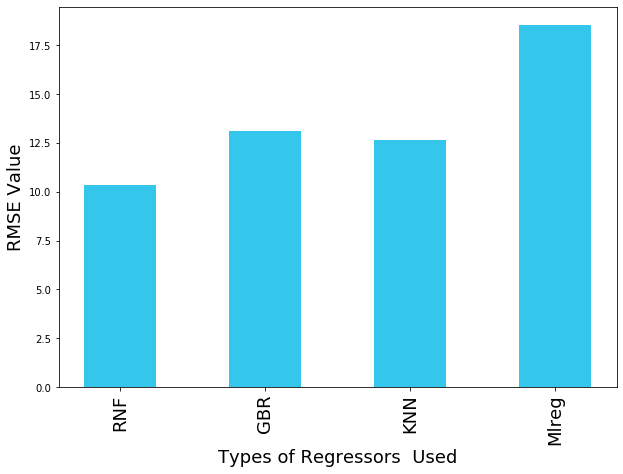

In [623]:
algorithm_type = [1,2,3,4]
LABELS = ["RNF", "GBR", "KNN","Mlreg"]
fig, ax = plt.subplots(figsize=(10, 7))
plt.bar(algorithm_type, RMSE, width=0.5,align='center',color='#34c6eb')
plt.xticks(algorithm_type, LABELS,size=18,rotation='vertical')
#plt.title("Accuracy Level for Train Data", size=16)
plt.xlabel("Types of Regressors  Used",size=18)
plt.ylabel("RMSE Value",size=18)
plt.show()